In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors
# Need the interactive Tools for Matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from adjustText import adjust_text
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import numpy as np
import matplotlib.pyplot as plt

stopz = 'http://rubenros.nl/wp-content/uploads/2019/08/stopwords-nl.txt'
req = requests.get(stopz)
stopz = str(req.content)
stopz = stopz.split('\\n')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [41]:
os.chdir('D:/Rampen/models/periods')
model = KeyedVectors.load('model-1780-1809.w2v')

os.chdir('D:/Rampen/text')
l = sorted(glob.glob('*articles*'))

In [42]:
df = pd.DataFrame()

for art in l[0:99]:
    with open(art,'r',encoding='utf-8') as f:
        lines = f.readlines()
    lines = [l for l in lines if "ramp " in l or "rampen " in l]
    
    windows = []
    for line in lines:
        ramp_instances = [c for c,i in enumerate(line.split(' ')) if i == "ramp" or i == "rampen"]
        
        for i in ramp_instances:
            wind = line.split(' ')[i-36:i+36]
            windows.append(wind)
    counted = Counter([item for sublist in windows for item in sublist if item not in stopz and len(item) > 2 and item != "ramp" and item != "rampen"]).most_common(1000)
    counted = {k:v for k,v in dict(counted).items() if v > 1}
    #summed = sum(counted.values())
    
    os.chdir('D:/Rampen/ngrams')
    total_freq = pd.read_csv(art[0:4]+"-unigrams.csv")
    if int(art[0:4]) < 1791:
        total_freq['gram'] = total_freq['gram'].str.replace("\(","")
        total_freq['gram'] = total_freq['gram'].str.replace(",\)","")
        total_freq['gram'] = total_freq['gram'].str.replace("'","")
    total_freq = dict(zip(total_freq['gram'], total_freq['count']))
    os.chdir('D:/Rampen/text')

    counted = {k:v/total_freq[k.replace('\n','')] for k,v in counted.items()}
    counted = pd.DataFrame(list(counted.items()),columns =['gram','count'])
    counted['year'] = art[0:4]
    df = df.append(counted)

KeyError: 'nan'

In [44]:
df

,gram,count,year
0,hoven,0.009524,1750
1,ofte,0.010000,1750
2,hoogte,0.017699,1750
3,grooter,0.041667,1750
4,stad,0.001283,1750
5,tooren,0.153846,1750
6,wylen,0.006897,1750
7,vrede,0.013793,1750
8,steden,0.007634,1750
0,zee,0.010554,1751


In [45]:
df = df.pivot(columns='year',index='gram',values='count')
df = df.reset_index()
df.head()

year,gram,1750,1751,1752,1753,1754,1755,1756,1757,1758,...,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808
0,011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0111,NaN,NaN,NaN,NaN,NaN,0.021978,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.002857,NaN,NaN,NaN,NaN
4,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


created list with 1246 words


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ontmoetingen | levensloop | staatsmannen | watersnood | latere | mengeling,berooven | verdubbelen | verbitteren | fcheppen | fporen | herwinnen,zuchten | kwade | beveiligde | natuurlyker | ydel | „alles,gunstig | verwyten | banieren | bejegenen | beoordeelen | inwilligen,onbewoond | overgekomen | btand | dermate | fchiet | geftegen,allerleye | hutten | turc | arragon | dykagie | dykcn,zwaardere | liefdegiften | vervolgingen | noodlydenden | voortgevloeid | behouding,zugten | zozeer | genoegens | oneindige | bygeloof | inboezemen,aangeteekend | overtegeeven | bedenkt | bouwers | flaa | toonende,geloovig | beftel | ontaarde | ziekbed | bitterfte | verblyden,...,hceien | quest | voortyds | jannetje | 2ifte | batavier,lyder | geftort | afgewend | geledene | droevige | ondergaan,schipbreuk | onheil | ongeval | deerlyk | overftrooming | aardbeevingen,oorlogs | nagaat | bankroet | fpoeden | verby | éerie,depaltz | zulk» | benaaming | geena | gematigden | kaning,voortvloeien | moederland | noodzaakelyk | drang | omftandighcden | perfoonlyke,onheilen | wederwaardigheden | tegenfpoeden | berokkend | akelig | evenementen,overmaat | dreigen | dreigd | hardnekkigheid | voorbode | gevoelden,year,sum
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1750,0.013793
1,0.000000,0.000000,0.000000,83.832335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16.167665,0.000000,0.000000,1751,0.088360
2,0.000000,0.000000,0.000000,1.237867,56.681803,20.115335,1.577673,2.774529,0.000000,4.736735,...,0.000000,7.128820,0.000000,0.000000,0.000000,0.000000,0.000000,5.747239,1752,2.485666
3,4.487036,0.000000,4.736316,2.664178,6.730554,0.000000,0.000000,2.939782,0.000000,0.000000,...,11.625502,0.312285,18.904331,0.476278,0.000000,28.827768,9.743278,5.683579,1753,2.345940
4,21.760679,3.549315,0.000000,2.192224,5.060246,6.084539,0.000000,6.306993,0.985921,0.364656,...,3.549315,5.896569,6.552445,1.971841,2.535225,2.698626,4.197205,16.089924,1754,11.269781
5,6.759490,0.000000,0.000000,16.329585,7.028369,17.813148,9.664755,0.000000,6.840249,0.000000,...,9.327612,9.757004,7.735070,0.000000,0.000000,2.050655,0.000000,2.030256,1755,10.720857
6,9.256713,0.000000,0.000000,3.013955,2.336399,5.169284,3.130244,0.147390,15.770697,6.351942,...,10.513798,2.987671,3.949860,0.876150,4.731209,7.700708,1.689717,0.606565,1756,6.340874
7,4.991087,2.094162,0.000000,1.771983,10.941997,11.517892,15.706216,0.823865,11.517892,0.000000,...,0.000000,6.539147,5.728294,0.535716,0.000000,12.902156,11.613874,1.221556,1757,8.682144
8,26.634209,0.000000,0.951222,0.000000,13.328133,20.926879,0.455286,8.878070,0.000000,0.739839,...,0.000000,11.809262,0.273171,0.000000,0.292684,1.137187,3.551228,5.104117,1758,3.754570
9,0.000000,4.739537,11.374889,0.000000,0.000000,0.557593,18.958148,0.000000,0.000000,9.479074,...,28.437222,2.736071,15.199205,1.421861,6.195252,0.901148,0.000000,0.000000,1759,3.516518


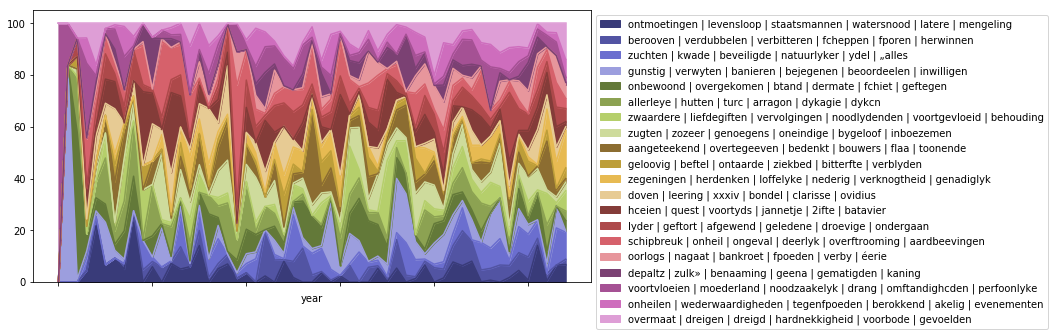

In [47]:
cdf = ClusterWord(MatrixPeriod(0.25,df),20)
dtw = GetClusterNames(cdf, df, 1750, 55)
ClusterDf(cdf, df, 1750, 55, dtw)

In [16]:
def MatrixPeriod(freq_threshold, df):
    
    df = pd.melt(df, id_vars=['gram'])
    df['year'] = df['year'].astype(int)
    df['year'] = 'tot_count'
    df = df.groupby(['gram']).sum()
    
    list_words = list(df[df['value'] > freq_threshold].index)
    
    
    dmx = DistanceMatrix(list_words, model)
    
    return dmx

def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.vocab)]
    print("created list with " + str(len(list_words)) + " words")

    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

def ClusterWord(matrix, k):
    centroids,_ = kmeans(matrix,k)
    idx,_ = vq(matrix,centroids)
    
    return dict(zip(list(matrix.index), idx))


def GetClusterNames(clus_dict, df, start_year, interval):
    start_column = list(df.columns).index(str(start_year))
    df = df.iloc[:,np.r_[0,start_column:start_column+interval]]
    
    df = df[df.gram.isin([k for k,v in clus_dict.items()])]
    
    dict_topwords_cluster = dict()
    
    for cluster_id in list(set([v for k,v in clus_dict.items()])):
        list_words_cluster = [k for k,v in clus_dict.items() if v == cluster_id]
        
        tmpdf = df[df.gram.isin(list_words_cluster)]
        tmpdf['word_sum'] = tmpdf.iloc[:,1:len(tmpdf.columns)].sum(axis=1)
        
        topwords = list(tmpdf.nlargest(6,'word_sum').gram)
        topwords = " | ".join(topwords)
        dict_topwords_cluster.update({str(cluster_id):topwords})
        
        
    return dict_topwords_cluster

def ClusterDf(clus_dict, df, start_year, interval, dict_topwords_cluster):
    start_column = list(df.columns).index(str(start_year))
    df = df.iloc[:,np.r_[0,start_column:start_column+interval]]
    
    df = df[df.gram.isin([k for k,v in clus_dict.items()])]
    
    cluster_sums_dict = dict()
    
    # Calculate Diachronic Sums of Clusters
    for cluster_id in list(set([v for k,v in clus_dict.items()])):
        list_words_cluster = [k for k,v in clus_dict.items() if v == cluster_id]
        
        tmpdf = df[df.gram.isin(list_words_cluster)]
        
        tmpdf_sums = list(tmpdf.iloc[:,1:len(tmpdf.columns)].sum(axis=0))
        
        cluster_sums_dict.update({cluster_id:tmpdf_sums})
        
    cluster_sums = pd.DataFrame.from_dict(cluster_sums_dict)
    cluster_sums['year'] = list(range(start_year,start_year+interval))
    cluster_sums.columns = cluster_sums.columns.astype(str)
    
    cluster_sums['sum'] = cluster_sums.iloc[:,0:len(cluster_sums.columns)-1].sum(axis=1)
    
    for column in list(cluster_sums.columns)[0:len(cluster_sums.columns)-2]:
        cluster_sums[column] = cluster_sums[column] / cluster_sums['sum'] * 100
    
    range_years = [str(y) for y in list(cluster_sums.columns)[0:len(cluster_sums.columns)-2]]
    
    ### Set top words as labels
    cluster_sums.columns = list([v for k,v in dict_topwords_cluster.items()]) + ['year', 'sum']    
    cluster_sums['year'] = cluster_sums['year'].astype(str)
    cluster_sums.plot(x="year", y = list([v for k,v in dict_topwords_cluster.items()]), kind="area", colormap = "tab20b", figsize=(10,5)).legend(bbox_to_anchor=(1, 1))
    return cluster_sums

In [23]:
model = KeyedVectors.load('model-1830-1850.w2v')

In [27]:
adjs = [w for w in adj if w in list(m.wv.vocab.keys())]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [28]:
def DistanceMatrix(list_words, model):
    
    list_words = [w for w in list_words if w in list(model.vocab)]
    print("created list with " + str(len(list_words)) + " words")

    total_list = list()
    
    for word in list_words:
        
        list_word = list()
        
        for term in list_words:
            #tmp = model.distance(word, term)
            tmp = model.similarity(word, term)

            list_word.append(tmp)
        
        total_list.append(list_word)
    df = pd.DataFrame(total_list, columns = list_words, index = list_words)
    return df

In [34]:
d = DistanceMatrix(list(set(adjs)),m)

created list with 199 words


C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [35]:
d.to_csv('dm-adjectives.csv')

NameError: name 'nx' is not defined

In [ ]:
z